## Data Visualizations

#### Importing Necessary Libraries

In [53]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd
import numpy as np
#import os
import re
import seaborn as sns
%matplotlib inline
from sklearn import feature_selection
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

In [2]:
df = pd.read_pickle('full_data.pkl')

In [3]:
df_numeric=pd.read_pickle('numeric_data.pkl')

In [4]:
df_std=pd.read_pickle('standardized.pkl')

In [5]:
df_categ=pd.read_pickle('categ_data.pkl')

In [25]:
df_categ.head().T

,0,1,2,3,4
grade,C,C,B,A,C
sub_grade,C4,C1,B5,A4,C5
emp_title,Ryder,AIR RESOURCES BOARD,University Medical Group,Veolia Transportaton,Southern Star Photography
home_ownership,RENT,RENT,RENT,RENT,RENT
addr_state,GA,CA,OR,AZ,NC
newPurpose,car,other,other,personal,credit_card
verification,Verified,Verified,Verified,Verified,Not Verified
defaulter,Yes,No,No,No,No


## correlation map

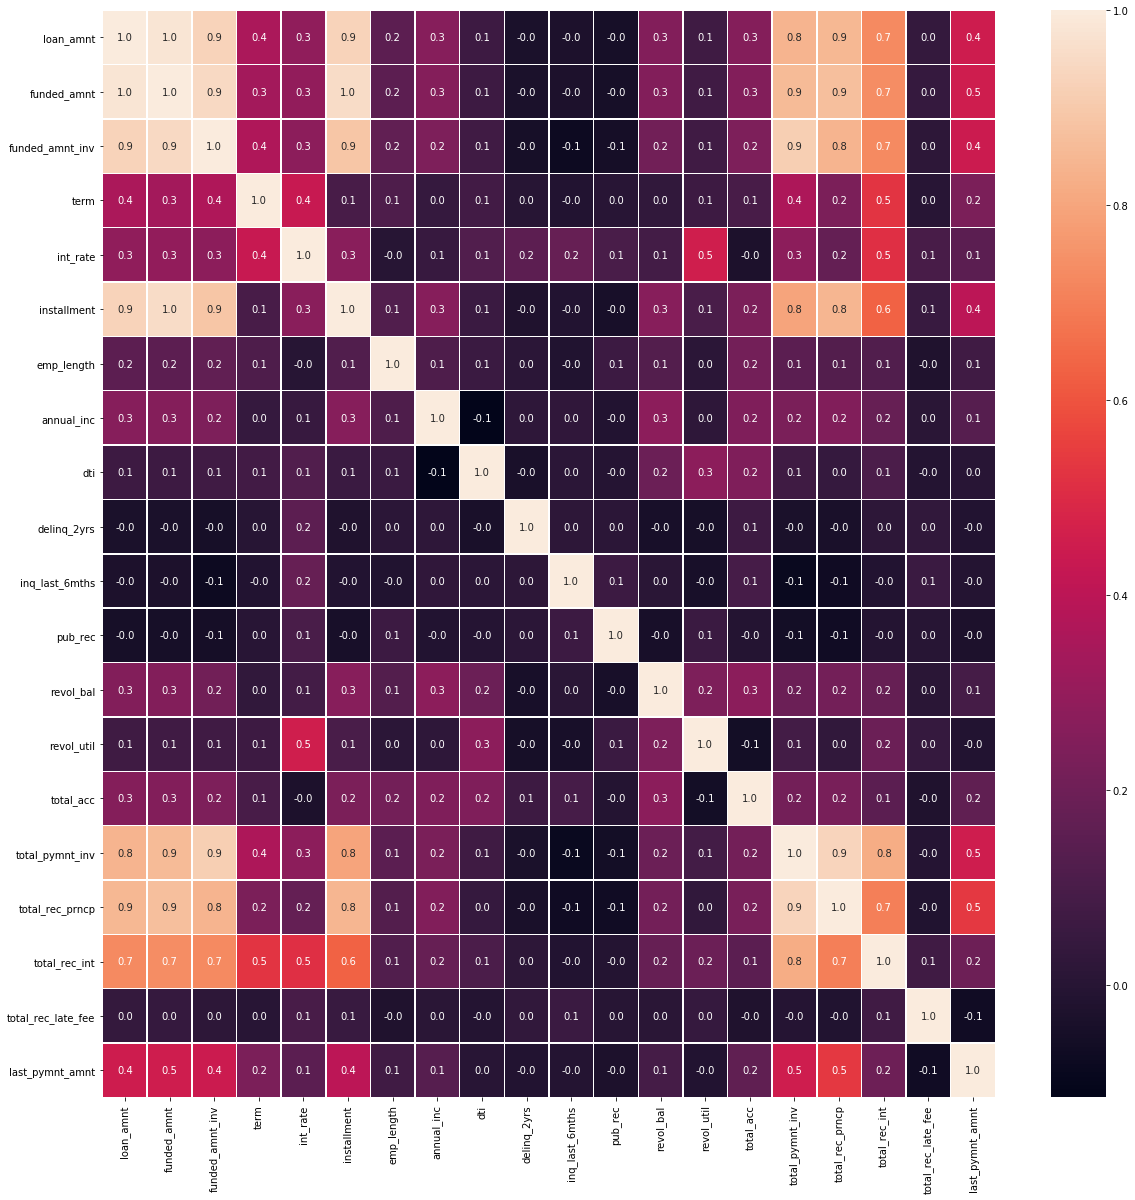

In [7]:

f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_numeric.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Highly Correlated Features

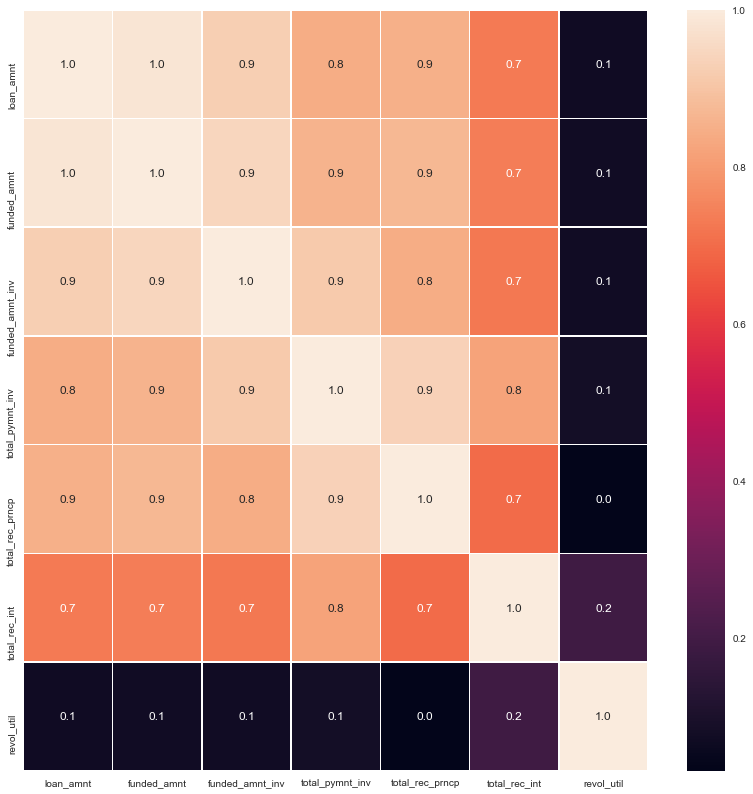

In [12]:
data = df_numeric[["loan_amnt","funded_amnt","funded_amnt_inv",
                  "total_pymnt_inv","total_rec_prncp","total_rec_int","revol_util"]]
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### A Violin Distribution of highly correlated features

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

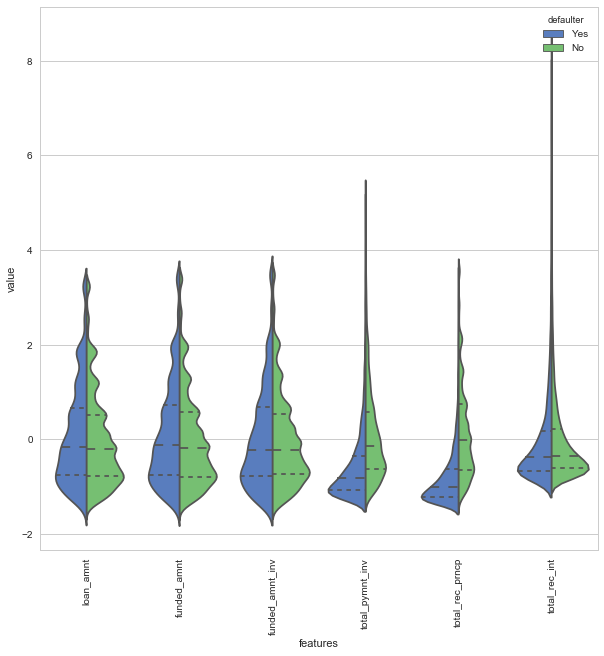

In [13]:

y=df['defaulter']
data = df_numeric[["loan_amnt","funded_amnt","funded_amnt_inv",
                  "total_pymnt_inv","total_rec_prncp","total_rec_int"]]
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="defaulter",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="defaulter", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

### Class Imbalance

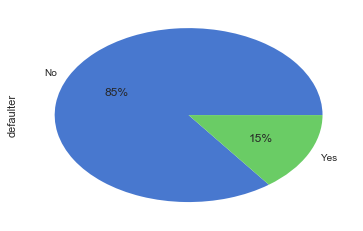

In [15]:
df_categ['defaulter'].value_counts().plot(kind='pie',autopct='%.0f%%',
                                    shadow=False, radius=1.0)
plt.show()

# Strategic Planning  : Market 

### Types of Loan Purpose

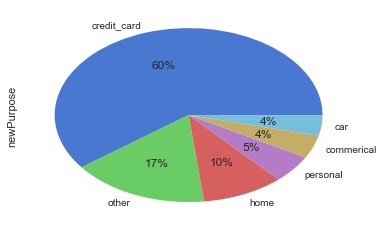

In [16]:

df_categ['newPurpose'].value_counts().plot(kind='pie',autopct='%.0f%%',
                                    shadow=False, radius=1.0)
plt.show()

#### number of loan applicants by verification_status


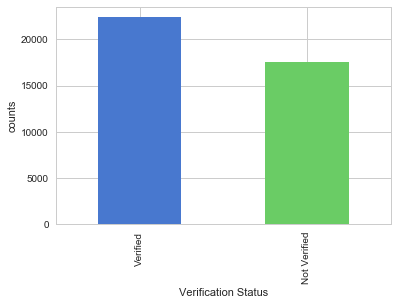

In [46]:

df_categ['verification'].value_counts().plot(kind='bar')
plt.xlabel('Verification Status')
plt.ylabel('counts')
plt.show()

## Relation of home ownership with loan amnt


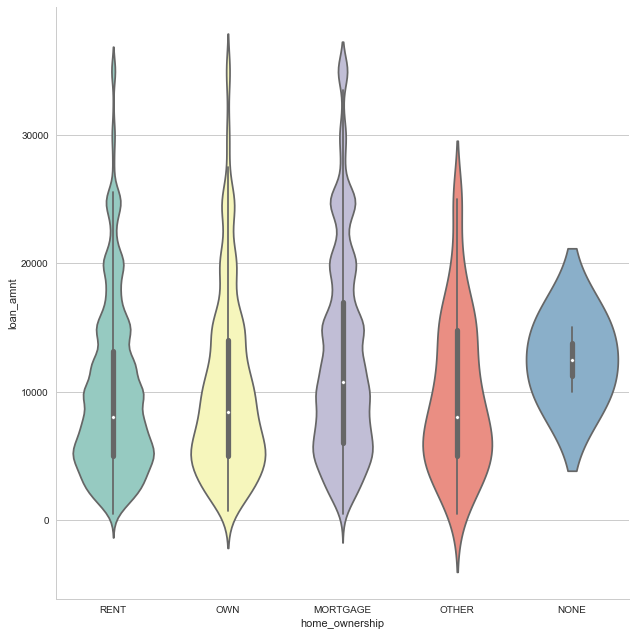

In [20]:

sns.factorplot(x="home_ownership",y="loan_amnt",data=df,size=9,
               kind="violin",split=True,palette="Set3")
plt.show()

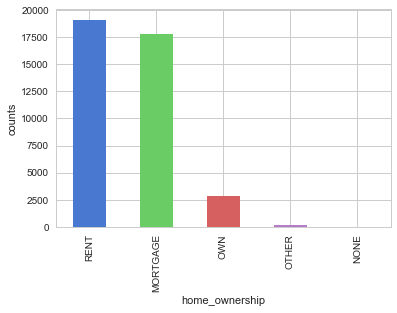

In [45]:
#no of loans by verification status
df_categ['home_ownership'].value_counts().plot(kind='bar')
plt.xlabel('home_ownership')
plt.ylabel('counts')
plt.show()

### Relation of LC Grade with loan amount 

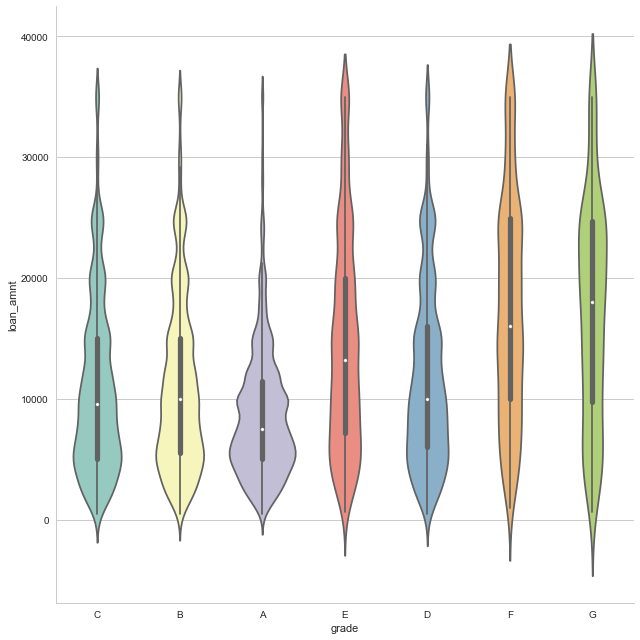

In [42]:
sns.factorplot(x="grade",y="loan_amnt",data=df,size=9,
               kind="violin",split=True,palette="Set3")
plt.show()

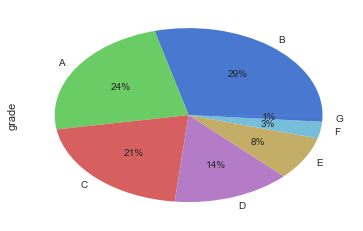

In [44]:

df_categ['grade'].value_counts().plot(kind='pie',autopct='%.0f%%',
                                    shadow=False, radius=1.0)
plt.show()

## top 10 states by number of loans

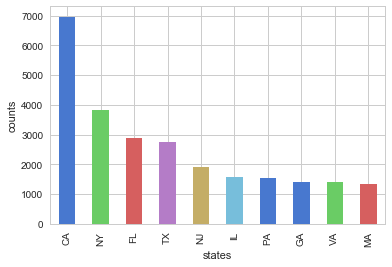

In [23]:

df_categ['addr_state'].value_counts().head(10).plot(kind='bar')
plt.xlabel('states')
plt.ylabel('counts')
plt.show()